In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [1]:
path = r'C:\Users\Forcessofnature\Documents\Mortgage-Analysis-Project\docs\coef_lgr_agg3.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Feature,Coefficient,state
0,Intercept,-1.031886,NY
1,derived_sex_Male,0.000000,NY
2,race_ethnicity_White,0.000000,NY
3,applicant_age_25-34,0.000000,NY
4,occupancy_type_Principal Residence,0.000000,NY


In [42]:
import numpy as np

# Assuming df contains the data with 'state', 'Feature', and 'Coefficient' columns

# Group by 'state' and normalize coefficients
df['probability'] = df.groupby('state')['Coefficient'].transform(lambda x: np.exp(x) / np.exp(x).sum())

# Print DataFrame with added probability column
print(df)


                                Feature  Coefficient state  probability
0                             Intercept    -1.031886    NY     0.003143
1                      derived_sex_Male     0.000000    NY     0.008820
2                  race_ethnicity_White     0.000000    NY     0.008820
3                   applicant_age_25-34     0.000000    NY     0.008820
4    occupancy_type_Principal Residence     0.000000    NY     0.008820
..                                  ...          ...   ...          ...
434                   county_code_48499     0.009382    TX     0.002958
435                   county_code_48501    -0.188129    TX     0.002428
436                   county_code_48503    -0.075862    TX     0.002716
437                   county_code_48505    -0.033158    TX     0.002835
438                   county_code_48507    -0.074963    TX     0.002719

[439 rows x 4 columns]


In [44]:
sum(df.loc[df['state'] =='NY', 'probability'])

1.0

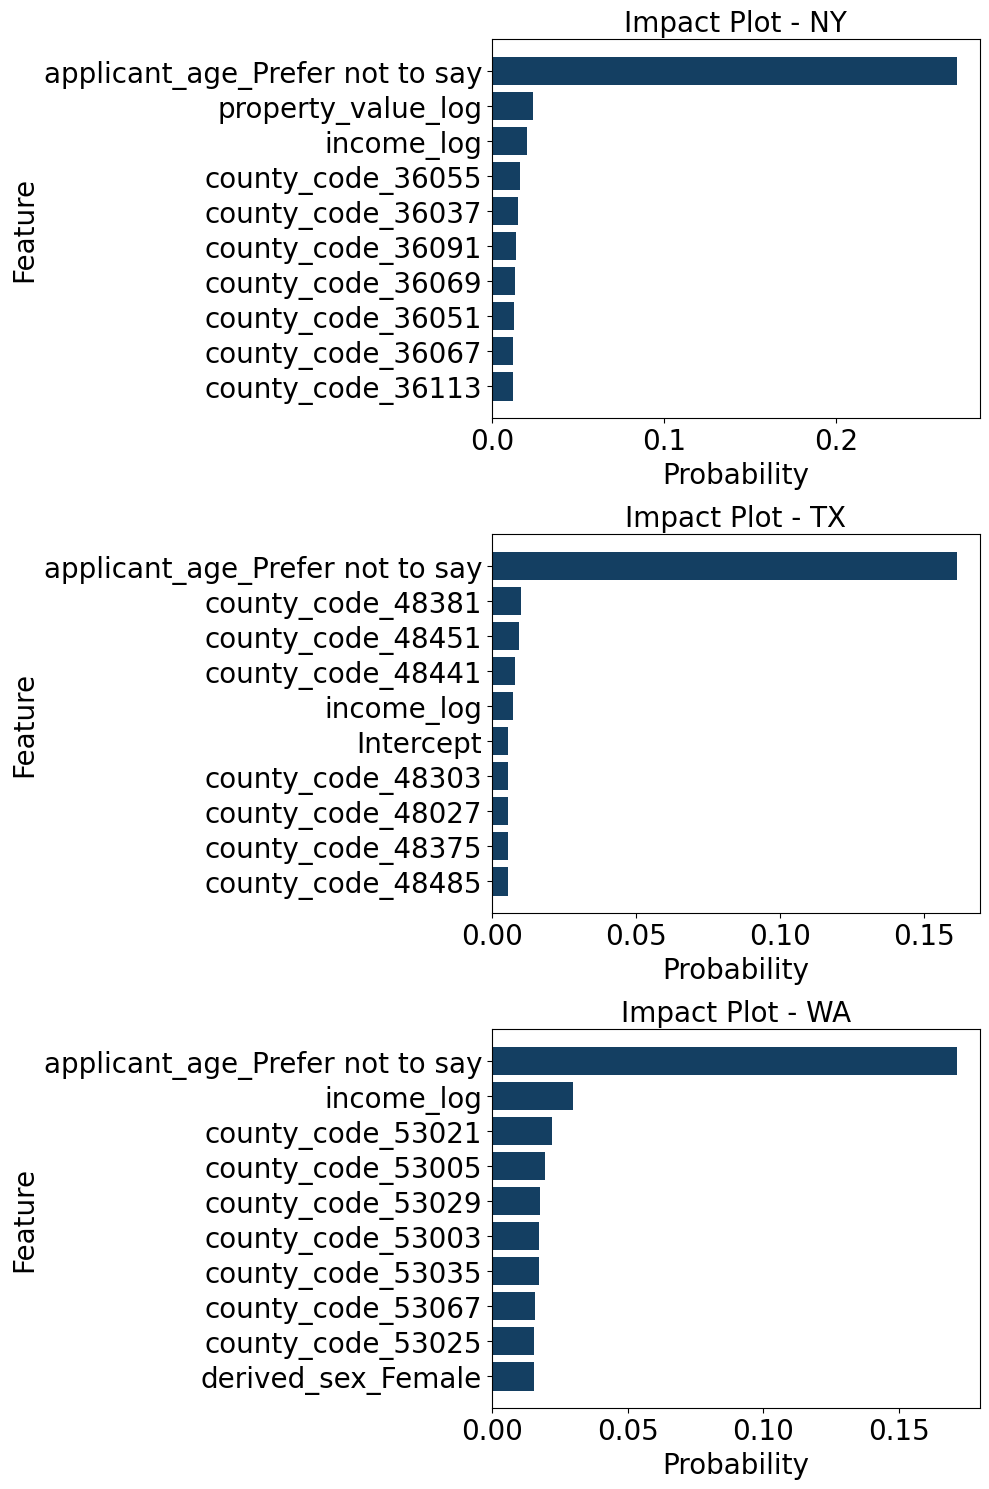

In [45]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'state' and 'probability' in descending order
sorted_df = df.sort_values(by=['state', 'probability'], ascending=False)

# Create subplots for each state
fig, axes = plt.subplots(nrows=len(sorted_df['state'].unique()), figsize=(10, 15))

# Iterate over each state and create impact plots
for i, (state, data) in enumerate(sorted_df.groupby('state')):
    ax = axes[i] if len(sorted_df['state'].unique()) > 1 else axes
    
    # Get top 10 features for the current state
    top_10_data = data.head(10)
    
    # Plot horizontal bar chart for top 10 features
    ax.barh(top_10_data['Feature'], top_10_data['probability'], color='#143F62')
    
    # Set title and labels with font size 20
    ax.set_title(f'Impact Plot - {state}', fontsize=20)
    ax.set_xlabel('Probability', fontsize=20)
    ax.set_ylabel('Feature', fontsize=20)
    ax.invert_yaxis()  # Invert y-axis to display the feature with the highest coefficient at the top

    # Set tick label size
    ax.tick_params(axis='both', which='major', labelsize=20)

# Adjust layout
plt.tight_layout()
plt.show()
